In [58]:
using LinearAlgebra
using Distributions
using LaTeXStrings
using Printf
using FileIO
import JLD2

In [59]:
using DataFrames

In [60]:
using Revise
using Newtrinos
using Newtrinos.osc

In [61]:
using Pkg
Pkg.status() 

Status `~/.julia/environments/myenv/Project.toml`
⌃ [13f3f980] CairoMakie v0.13.6
⌃ [7073ff75] IJulia v1.27.0
  [5b289081] Newtrinos v1.0.0-DEV `~/Newtrinos.jl`
⌃ [295af30f] Revise v3.7.5
⌃ [3cd96dde] UnROOT v0.8.20
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [62]:
osc_cfg = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.NND(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )


OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}(NND(ThreeFlavour(:NO)), SI(), Basic(), Newtrinos.osc.All())

In [63]:
osc = Newtrinos.osc.configure(osc_cfg)

Newtrinos.osc.Osc(OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}(NND(ThreeFlavour(:NO)), SI(), Basic(), Newtrinos.osc.All()), (θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761, δCP = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, m₀ = 0.01, N = 20.0, r = 1.0), (θ₁₂ = Uniform{Float64}(a=0.4205343352839651, b=0.7853981633974483), θ₁₃ = Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = Uniform{Float64}(a=0.5235987755982988, b=1.0471975511965976), δCP = Uniform{Float64}(a=0.0, b=6.283185307179586), Δm²₂₁ = Uniform{Float64}(a=6.5e-5, b=9.0e-5), Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), m₀ = Uniform{Float64}(a=0.001, b=1.0), N = Uniform{Float64}(a=1.0, b=90.0), r = Uniform{Float64}(a=1.0e-8, b=1.0)), Newtrinos.osc.var"#get_Nnaturalness#49"(), Newtrinos.osc.var"#osc_prob#39"{Newtrinos.osc.var"#osc_prob#37#40"{OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}}}(Newtrinos.osc.var"#osc_prob#37#40"{OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}}(OscillationC

In [64]:

atm_flux = Newtrinos.atm_flux.configure()
earth_layers = Newtrinos.earth_layers.configure()
xsec = Newtrinos.xsec.configure()

physics = (; osc, atm_flux, earth_layers, xsec);

In [68]:
experiments = (

 deepcore = Newtrinos.deepcore.configure(physics),
 
);

[ Info: Loading deepcore data


In [69]:
p = Newtrinos.get_params(experiments)

(N = 20.0, atm_flux_delta_spectral_index = 0.0, atm_flux_nuenumu_sigma = 0.0, atm_flux_nunubar_sigma = 0.0, atm_flux_uphorizonzal_sigma = 0.0, deepcore_atm_muon_scale = 1.0, deepcore_ice_absorption = 1.0, deepcore_ice_scattering = 1.0, deepcore_lifetime = 2.5, deepcore_opt_eff_headon = 0.0, deepcore_opt_eff_lateral = 0.0, deepcore_opt_eff_overall = 1.0, m₀ = 0.01, nc_norm = 1.0, nutau_cc_norm = 1.0, r = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

In [ ]:
img = experiments.plot(p)
display("image/png", img)
save("/home/sofialon/Newtrinos.jl/natural plot/deepcore/deepcore_data_NND.png", img)

LoadError: type NamedTuple has no field plot

In [72]:

all_priors = Newtrinos.get_priors(experiments)


vars_to_scan = (θ₂₃=31, Δm²₃₁=31)

modified_priors = (
   # N =all_priors.N, 
    #m₀= all_priors.m₀,
    #r = all_priors.r,
    


    Δm²₂₁ = p.Δm²₂₁,  
    Δm²₃₁ =all_priors.Δm²₃₁ , 
    δCP = p.δCP,    
    θ₁₂ = p.θ₁₂,    
    θ₁₃= p.θ₁₃,       
    θ₂₃ = all_priors.θ₂₃
)


(Δm²₂₁ = 7.53e-5, Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = Uniform{Float64}(a=0.5235987755982988, b=1.0471975511965976))

In [73]:
likelihood = Newtrinos.generate_likelihood(experiments);


In [ ]:
result = Newtrinos.scan(likelihood, modified_priors, vars_to_scan, p)
#result = Newtrinos.scan(likelihood, Newtrinos.get_priors(experiments), (r=31, N=31), p)

In [ ]:
using CairoMakie

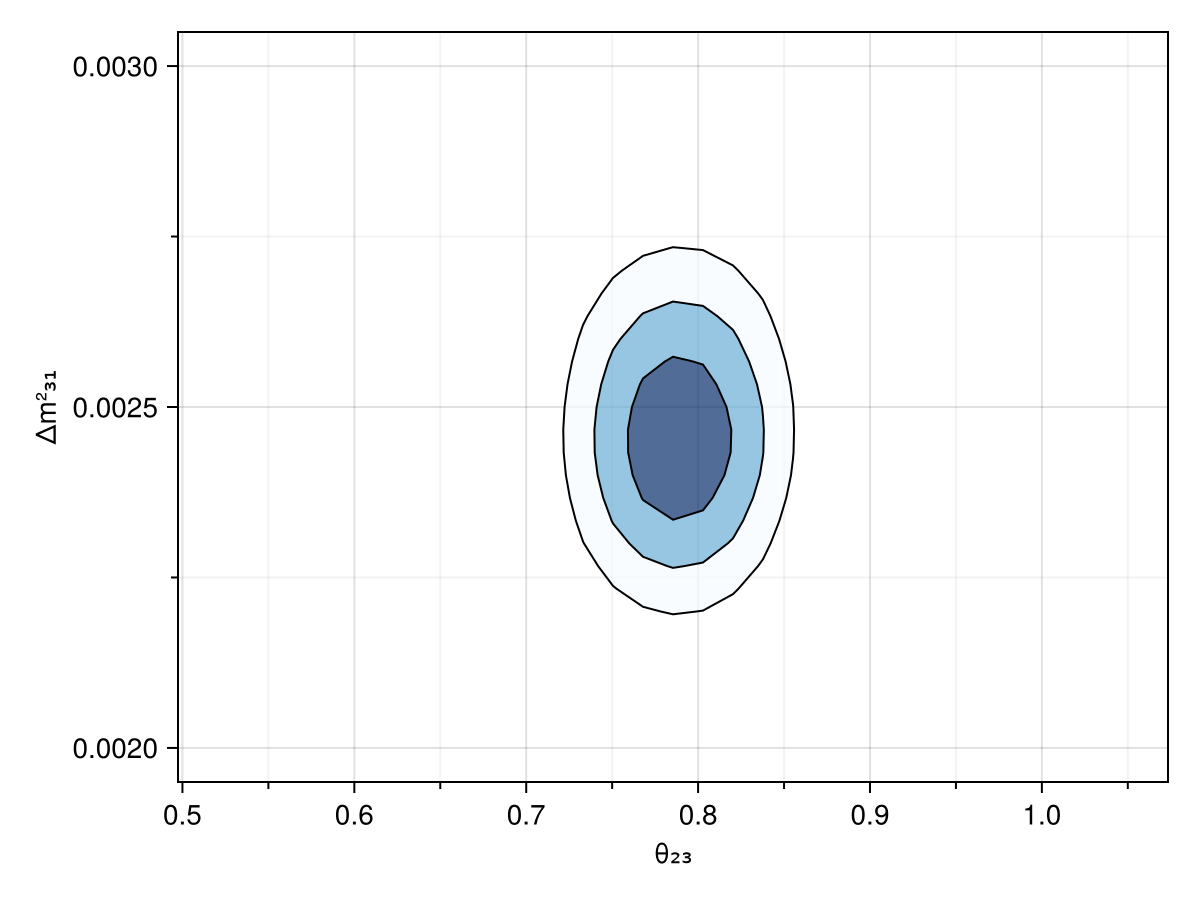

In [ ]:
img = CairoMakie.plot(result)
display("image/png", img)
save("/home/sofialon/Newtrinos.jl/natural plot/deepcore/deepcore_thetadelta_NND.png", img)
